# Exploratory Data Analysis: Gaming Intent Dataset

This notebook explores the gaming intent dataset to understand its
characteristics and prepare for model development.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

In [2]:
# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Display all columns
pd.set_option('display.max_columns', None)

## 1. Load the Dataset

In [3]:
df = pd.read_csv('../datasets/gaming_intent_dataset.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (5000, 5)


,id,text,is_gaming_related,main_category,detailed_category
0,1,The Commander Shepard boss fight in Animal Cro...,True,discuss_reference,game_discussion
1,2,When is Starfield getting its next update?,True,discuss_reference,game_discussion
2,3,The graphics in Assassin's Creed Mirage are ab...,True,discuss_reference,game_discussion
3,4,Is Horizon Forbidden West worth buying at full...,True,discuss_reference,game_discussion
4,5,Looking for people to play Resident Evil 4 Rem...,True,discuss_reference,game_discussion


In [4]:
print("Missing values:")
df.isnull().sum()

Missing values:


id                   0
text                 0
is_gaming_related    0
main_category        0
detailed_category    0
dtype: int64

In [6]:
print("Data types:")
print(df.dtypes)


Data types:
id                    int64
text                 object
is_gaming_related      bool
main_category        object
detailed_category    object
dtype: object


## 2. Class Distribution

Since the `is_gaming_related` column is boolean, mapping is not performed

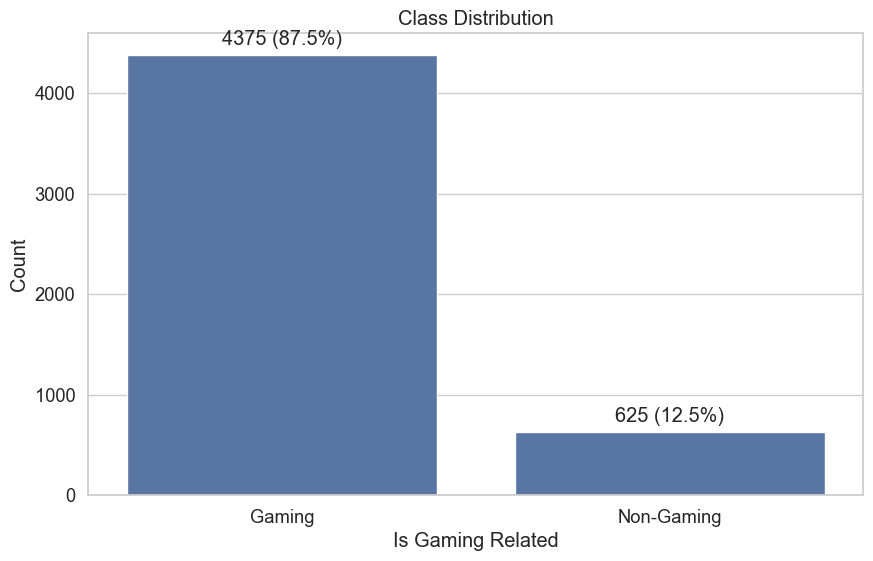

In [7]:
class_counts = df['is_gaming_related'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_counts.index.map({True: 'Gaming', False: 'Non-Gaming'}), 
                 y=class_counts.values)

plt.title('Class Distribution')
plt.xlabel('Is Gaming Related')
plt.ylabel('Count')

# Add count labels
for i, (idx, count) in enumerate(zip(class_counts.index, class_counts.values)):
    label = 'Gaming' if idx else 'Non-Gaming'
    percentage = count/len(df)*100
    plt.text(i, count + 100, f"{count} ({percentage:.1f}%)", ha='center')

plt.show()

## 3. Category Distribution

In [8]:
main_category_counts = df['main_category'].value_counts()
print("Main category distribution:")
print(main_category_counts)

Main category distribution:
main_category
discuss_reference    1875
request_info         1875
express_opinion       625
non_gaming            625
Name: count, dtype: int64


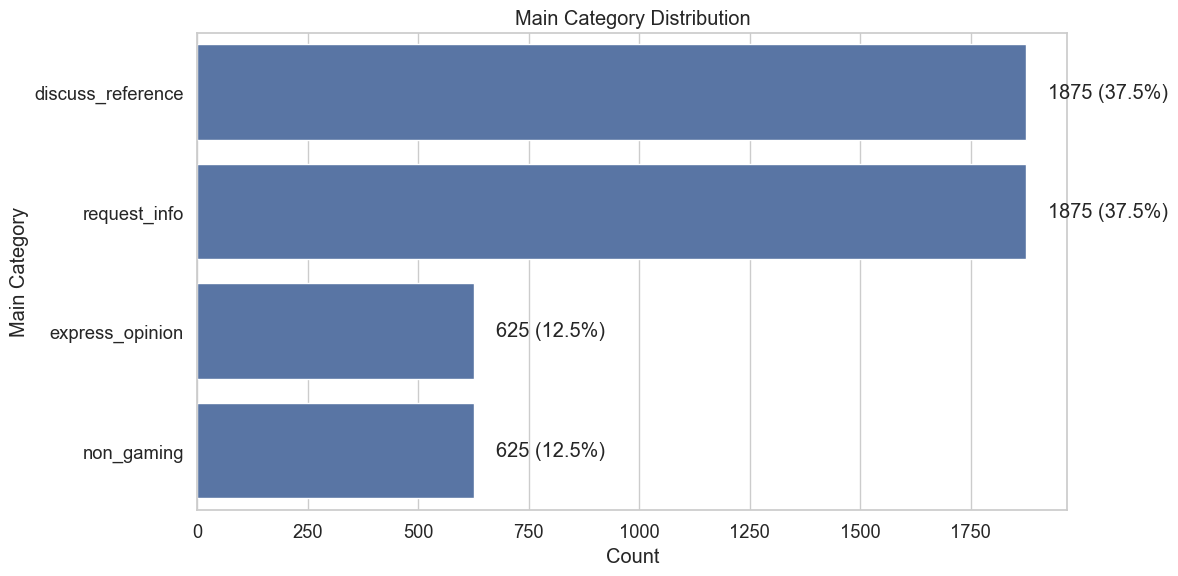

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='main_category', data=df, order=main_category_counts.index)
plt.title('Main Category Distribution')
plt.xlabel('Count')
plt.ylabel('Main Category')

for i, count in enumerate(main_category_counts):
    plt.text(count + 50, i, f"{count} ({count/len(df)*100:.1f}%)", va='center')

plt.tight_layout()
plt.show()

In [10]:
detailed_category_counts = df['detailed_category'].value_counts()
print("Detailed category distribution:")
print(detailed_category_counts)

Detailed category distribution:
detailed_category
game_discussion            625
platform_discussion        625
accessory_discussion       625
recommendation_request     625
troubleshooting_request    625
information_request        625
opinion_expression         625
non_gaming                 625
Name: count, dtype: int64


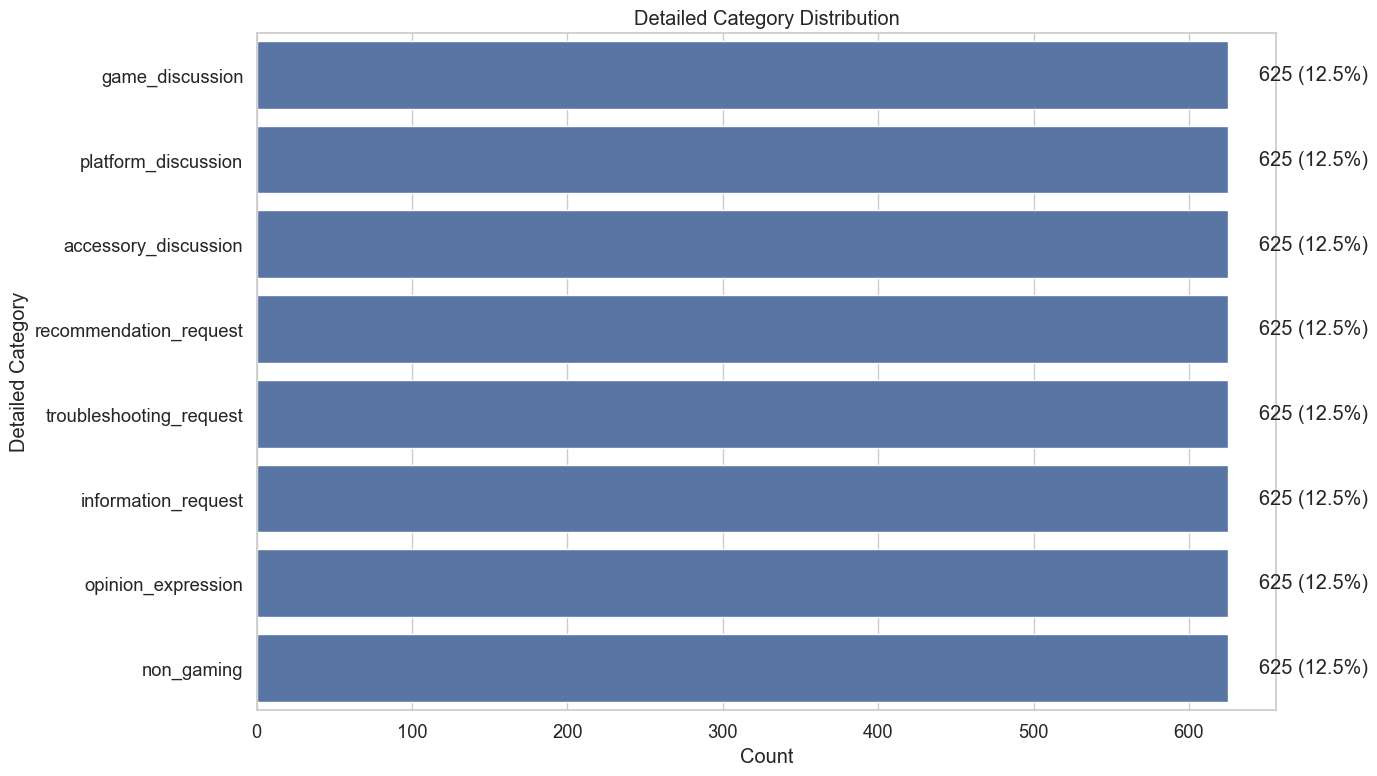

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(y='detailed_category', data=df, order=detailed_category_counts.index)
plt.title('Detailed Category Distribution')
plt.xlabel('Count')
plt.ylabel('Detailed Category')

for i, count in enumerate(detailed_category_counts):
    plt.text(count + 20, i, f"{count} ({count/len(df)*100:.1f}%)", va='center')
plt.tight_layout()
plt.show()


## 4. Text Analysis

In [12]:
df['text_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
print(f"Average text length: {df['text_length'].mean():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Minimum text length: {df['text_length'].min()} characters")
print(f"Maximum text length: {df['text_length'].max()} characters")
print(f"Minimum words count: {df['word_count'].min()} words")
print(f"Maximum words count: {df['word_count'].max()} words")

Average text length: 53.03 characters
Average word count: 9.47 words
Minimum text length: 25 characters
Maximum text length: 105 characters
Minimum words count: 5 words
Maximum words count: 21 words


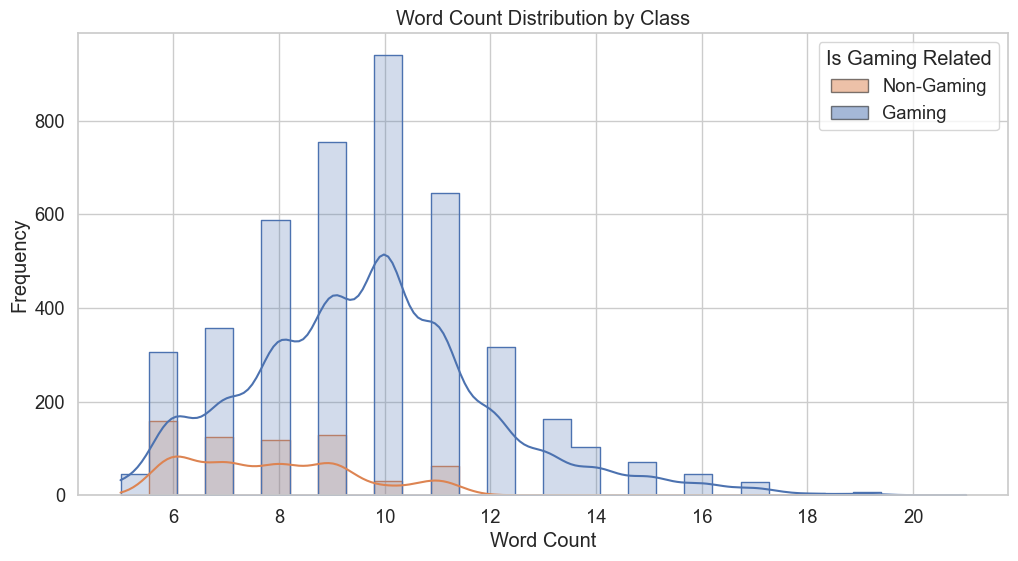

In [13]:
# Compare text length distribution by class
plt.figure(figsize=(12, 6))
hist_plot = sns.histplot(data=df, x='word_count', hue='is_gaming_related', 
             bins=30, kde=True, element='step',
             hue_order=[True, False])

plt.title('Word Count Distribution by Class')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Get the colors used in the plot
colors = hist_plot.get_children()[0].get_facecolor(), hist_plot.get_children()[2].get_facecolor()

legend_elements = [
    Patch(facecolor=colors[0], edgecolor='black', alpha=0.5, label='Non-Gaming'),
    Patch(facecolor=colors[1], edgecolor='black', alpha=0.5, label='Gaming')
]

plt.legend(handles=legend_elements, title='Is Gaming Related')

plt.show()

In [14]:
def get_common_words(texts, n=20):
    all_text = ' '.join(texts)
    
    # Convert to lowercase and split into words
    words = re.findall(r'[a-zA-Z]{3,}', all_text.lower())

    word_counts = Counter(words)
    stopwords = {'the', 'and', 'or', 'with', 'this', 'that', 'what', 'how', 'when', 'where'
                'who', 'why', 'which', 'are', 'you', 'your', 'can', 'has', 'have', 'any',
                'does', 'did', 'not', 'from', 'but', 'was', 'were', 'they', 'their', 'them',
                'there', 'here', 'should', 'would', 'could', 'will', 'just', 'for', 'after',
                'anyone'}

    for word in stopwords:
        if word in word_counts:
            del word_counts[word]

    return word_counts.most_common(n)

In [15]:
gaming_texts = df[df['is_gaming_related']]['text'].tolist()
gaming_common_words = get_common_words(gaming_texts, 20)
print(f"common words: {gaming_common_words}")

non_gaming_texts = df[~df['is_gaming_related']]['text'].tolist()
non_gaming_common_words = get_common_words(non_gaming_texts, 20)

print("Common words in gaming-related texts:")
for word, count in gaming_common_words:
    print(f"{word}: {count}")

print("Common words in non-gaming texts:")
for word, count in non_gaming_common_words:
    print(f"{word}: {count}")

common words: [('games', 613), ('play', 485), ('new', 459), ('gaming', 455), ('game', 402), ('playstation', 338), ('best', 295), ('xbox', 285), ('update', 261), ('worth', 258), ('need', 212), ('looking', 200), ('playing', 192), ('headset', 185), ('getting', 184), ('keeps', 184), ('recommendations', 180), ('good', 177), ('quest', 171), ('story', 155)]
Common words in gaming-related texts:
games: 613
play: 485
new: 459
gaming: 455
game: 402
playstation: 338
best: 295
xbox: 285
update: 261
worth: 258
need: 212
looking: 200
playing: 192
headset: 185
getting: 184
keeps: 184
recommendations: 180
good: 177
quest: 171
story: 155
Common words in non-gaming texts:
good: 132
looking: 107
job: 75
best: 66
need: 53
new: 44
software: 44
development: 44
workout: 39
routine: 39
beginners: 39
someone: 37
explain: 37
cryptocurrency: 37
works: 37
pizza: 34
place: 34
city: 34
some: 33
shows: 33


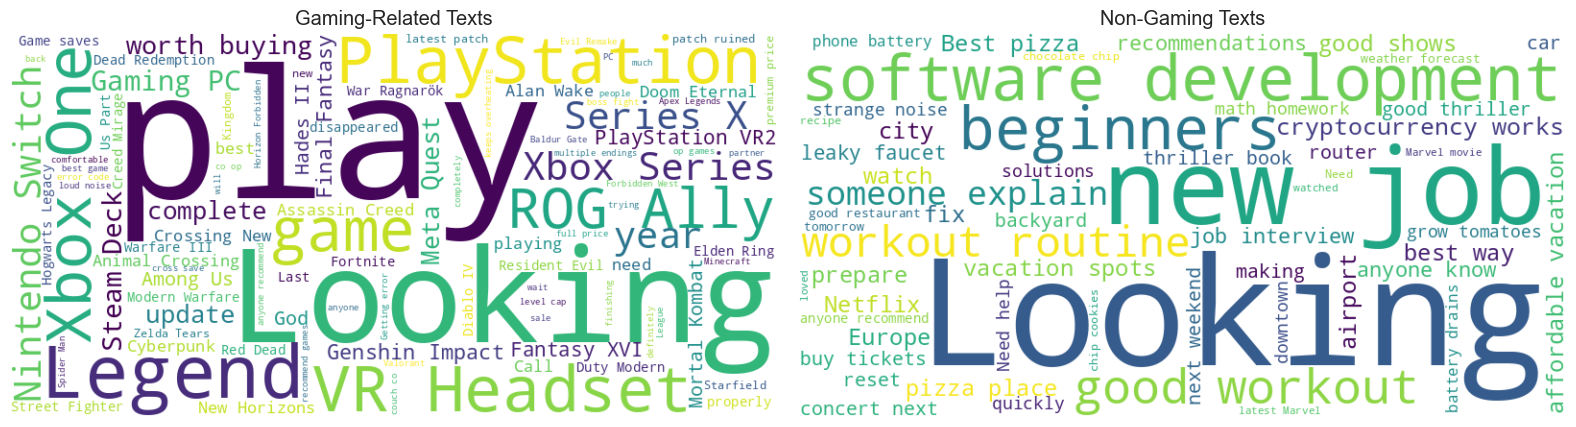

In [16]:
# Create word clouds
plt.figure(figsize=(16, 8))

# Gaming word cloud
plt.subplot(1, 2, 1)
gaming_text = ' '.join(gaming_texts)
gaming_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(gaming_text)
plt.imshow(gaming_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Gaming-Related Texts')

# Non-gaming word cloud
plt.subplot(1, 2, 2)
non_gaming_text = ' '.join(non_gaming_texts)
non_gaming_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(non_gaming_text)
plt.imshow(non_gaming_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Gaming Texts'),
plt.tight_layout()
plt.show()

## 5. Category Relationships

In [17]:
# Relationship between main category and is_gaming_related
main_category_gaming = pd.crosstab(df['main_category'], df['is_gaming_related'])
main_category_gaming_pct = pd.crosstab(df['main_category'], df['is_gaming_related'], normalize='index') * 100

print("Count of is_gaming_related by main_category:")
print(main_category_gaming)
print("Percentage of is_gaming_related by main_category:")
print(main_category_gaming_pct)

Count of is_gaming_related by main_category:
is_gaming_related  False  True 
main_category                  
discuss_reference      0   1875
express_opinion        0    625
non_gaming           625      0
request_info           0   1875
Percentage of is_gaming_related by main_category:
is_gaming_related  False  True 
main_category                  
discuss_reference    0.0  100.0
express_opinion      0.0  100.0
non_gaming         100.0    0.0
request_info         0.0  100.0


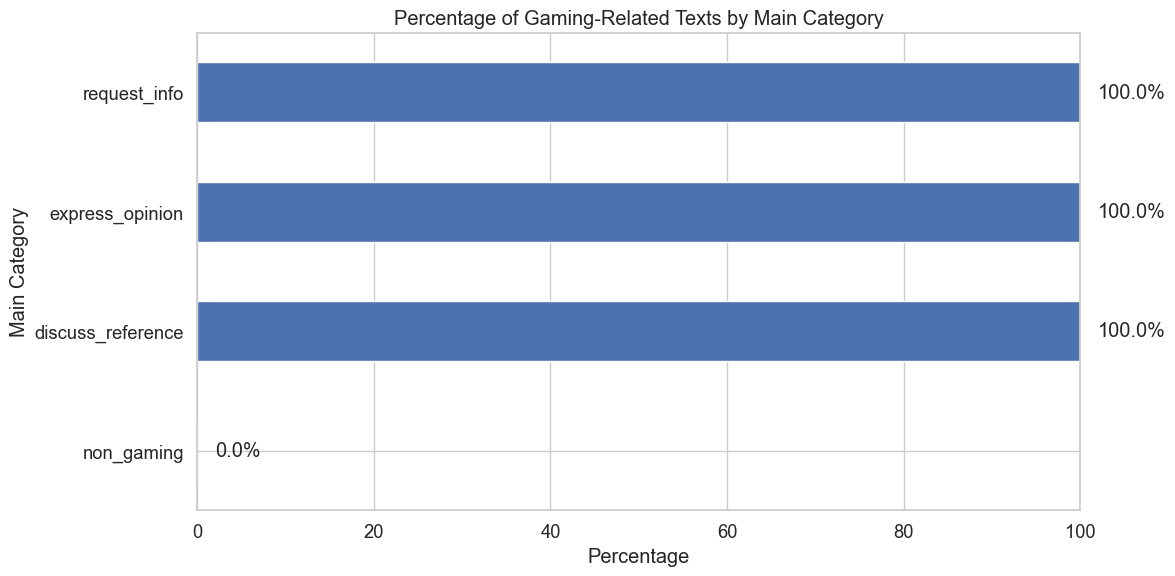

In [18]:
# Visualize relationship between main category and is_gaming_related
plt.figure(figsize=(12, 6))
main_category_gaming_pct[True].sort_values().plot(kind='barh')
plt.title('Percentage of Gaming-Related Texts by Main Category')
plt.xlabel('Percentage')
plt.ylabel('Main Category')
plt.xlim(0, 100)

for i, v in enumerate(main_category_gaming_pct[True].sort_values()):
    plt.text(v + 2, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()

In [19]:
# Relationship between detailed category and is_gaming_related
detailed_category_gaming = pd.crosstab(df['detailed_category'], df['is_gaming_related'])
detailed_category_gaming_pct = pd.crosstab(df['detailed_category'], df['is_gaming_related'], normalize='index') * 100

print("Count of is_gaming_related by detailed_category:")
print(detailed_category_gaming)
print("Percentage of is_gaming_related by detailed_category:")
print(detailed_category_gaming_pct)

Count of is_gaming_related by detailed_category:
is_gaming_related        False  True 
detailed_category                    
accessory_discussion         0    625
game_discussion              0    625
information_request          0    625
non_gaming                 625      0
opinion_expression           0    625
platform_discussion          0    625
recommendation_request       0    625
troubleshooting_request      0    625
Percentage of is_gaming_related by detailed_category:
is_gaming_related        False  True 
detailed_category                    
accessory_discussion       0.0  100.0
game_discussion            0.0  100.0
information_request        0.0  100.0
non_gaming               100.0    0.0
opinion_expression         0.0  100.0
platform_discussion        0.0  100.0
recommendation_request     0.0  100.0
troubleshooting_request    0.0  100.0


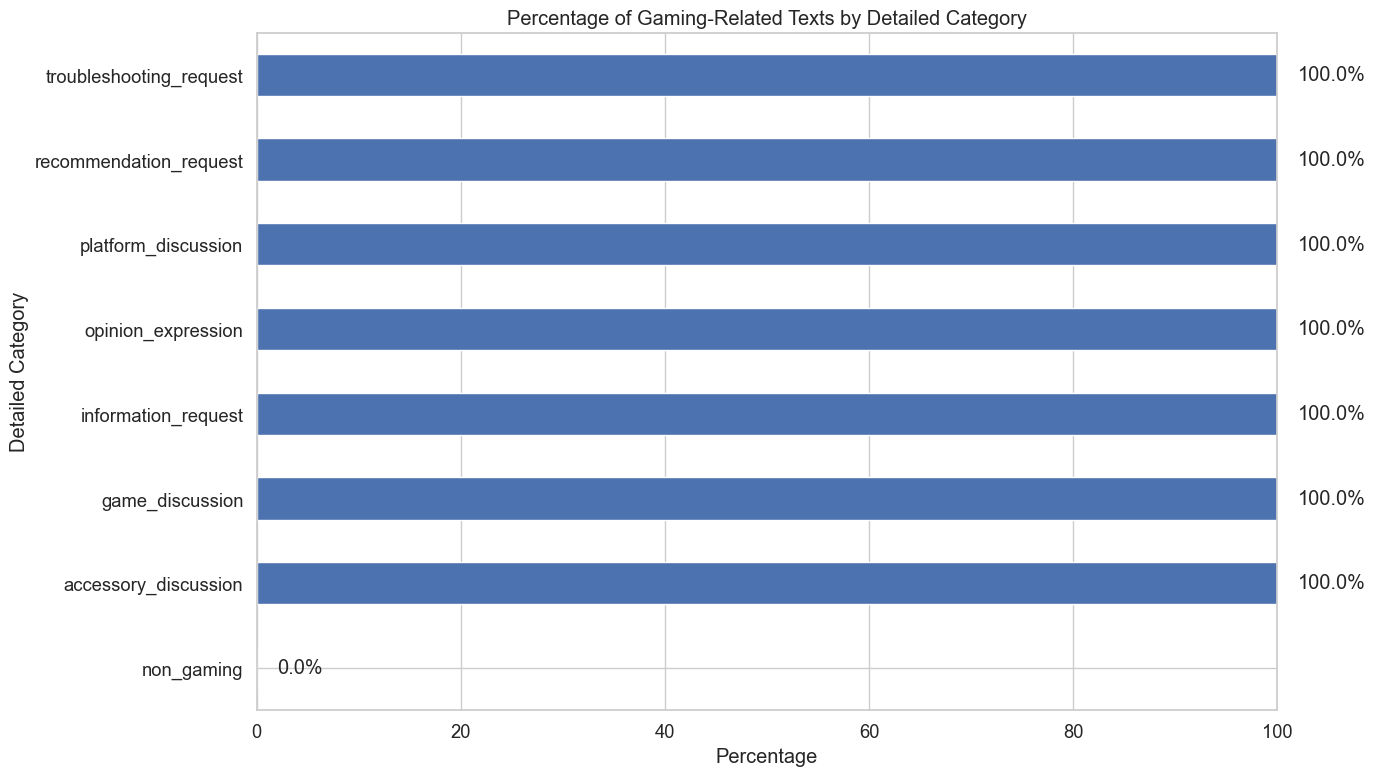

In [20]:
# Visualize relationship between detailed category and is_gaming_relate
plt.figure(figsize=(14, 8))
detailed_category_gaming_pct[True].sort_values().plot(kind='barh')
plt.title('Percentage of Gaming-Related Texts by Detailed Category')
plt.xlabel('Percentage')
plt.ylabel('Detailed Category')
plt.xlim(0, 100)

# Add percentage labels
for i, v in enumerate(detailed_category_gaming_pct[True].sort_values()):
    plt.text(v + 2, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()

## 6. Sample Texts

In [21]:
print("Sample gaming-related texts:")
for text in df[df['is_gaming_related']].sample(5)['text']:
    print(f"- {text}")

print("Sample non-gaming texts")
for text in df[~df['is_gaming_related']].sample(5)['text']:
    print(f"- {text}")

Sample gaming-related texts:
- When is Genshin Impact being released?
- The PC controller is much more comfortable than Steam Deck
- How long does it take to complete Starfield?
- Game saves for Starfield disappeared after update
- Where can I find the Golden Gun in Mortal Kombat 1?
Sample non-gaming texts
- What's the best way to get to the airport from here?
- Could anyone recommend a good restaurant in downtown?
- Need help with my math homework
- What's a good workout routine for beginners?
- Looking for recommendations for a good thriller book


## 7. Summary and Insights

### Key Findings:
1. **Class Imbalance**: The dataset is imbalanced with approximately 87.5% gaming-related examples and 12.5% non-gaming examples.
2. **Category Distribution**: The dataset includes various categories, with 'request_info' and 'discuss_reference' being the most common main categories.
3. **Text Length**: Gaming-related and non-gaming texts have similar length distributions, with most texts being relatively short (under 20 words).
4. **Vocabulary Differences**: Gaming-related texts contain specific game titles, character names, and gaming terminology, while non-gaming texts cover a wide range of everyday topics.
5. **Category Relationships**: Some categories are strongly associated with gaming-related content, while others (like 'non_gaming') are predominantly non-gaming. 

**Note**: This categories and their corresponding sub-categories can be leveraged to develop and evaluate a multi-class classification model, for more predictions and better understanding of user intent across different context.

### Implications for Modeling:
1. **Class Imbalance Handling**: Need to implement techniques to handle the class imbalance, such as class weights, stratified sampling, and appropriate evaluation metrics.
2. **Feature Importance**: Game titles and gaming terminology are likely to be strong predictors of gaming-related intent.
3. **Text Length**: The relatively short texts suggest that a maximum sequence length of 128 tokens should be sufficient for most examples.
4. **Evaluation Strategy**: Given the imbalance, metrics like F1 score and AUC-ROC will be more informative than accuracy.
